# Miscellaneous tools for slope stability analysis
© 2022 Exneyder A. Montoya-Araque, Daniel F. Ruiz and Universidad EAFIT.

This notebook can be interactively run in [Google - Colab](https://colab.research.google.com/github/eamontoyaa/EAFIT_slope_stability/blob/main/slope_stability_tools.ipynb).

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from shapely.geometry import Polygon
from ipywidgets import interact, widgets

plt.style.use("default")
mpl.rcParams.update(
    {
        "text.usetex": False,  # Use mathtext, not LaTeX
        "font.family": "serif",  # Use the Computer modern font
        "font.serif": "cmr10",
        "mathtext.fontset": "cm",
        "axes.formatter.use_mathtext": True,
        "axes.unicode_minus": False
    }
)

## Area and centroid of a mass sliding along a circular surface

### Funtions

In [6]:
def slope(height=8, inclination=45, hzt_dist=4):
    inclination = np.radians(inclination)
    hzt_slope = height / np.tan(inclination)  # horizontal dist. of slope face
    terrain_coords = np.array(
        (
            (-hzt_dist, 0, hzt_slope, hzt_slope + hzt_dist),
            (0, 0, height, height),
        )
    )
    return terrain_coords


def circular_surface(center_x, center_y, height):
    radius = np.linalg.norm((center_x, center_y))
    x_max = np.sqrt(radius**2 - (height - center_y) ** 2) + center_x
    x = np.linspace(0, x_max, 50)
    y = -np.sqrt(radius**2 - (x - center_x) ** 2) + center_y
    slip_surf_coords = np.array((x, y))
    return slip_surf_coords


def get_geometric_parameters(terrain_coords, slip_surf_coords):
    mass_coords = np.vstack((slip_surf_coords.T, terrain_coords[:, 2]))
    mass_polygon = Polygon(mass_coords)
    return mass_polygon


def plot_slope(
    height=8, inclination=45, hzt_dist=4, center_x=3.5, center_y=11.5
):
    terrain_coords = slope(height, inclination, hzt_dist)
    slip_surf_coords = circular_surface(center_x, center_y, height)
    mass_polygon = get_geometric_parameters(terrain_coords, slip_surf_coords)
    fig, ax = plt.subplots(ncols=1, nrows=1, figsize=[6, 4])
    ax.plot(terrain_coords[0], terrain_coords[1], "k")
    ax.plot(
        slip_surf_coords[0],
        slip_surf_coords[1],
        "tomato",
        ls="--",
        label=f"Slip surface - Area: {mass_polygon.area:.2f} m$^2$",
    )
    ax.plot(
        center_x,
        center_y,
        color="tomato",
        marker="x",
        ls="",
        label=f"Center: $x=${center_x:.1f} m, $y=${center_y:.1f} m",
    )
    ax.plot(
        *mass_polygon.centroid.xy,
        color="teal",
        marker="o",
        ls="",
        label=f"Centroid: $x=${mass_polygon.centroid.x:.1f} m, "
        + f"$y=${mass_polygon.centroid.y:.1f} m",
    )
    ax.set(xlabel="$x$ [m]", ylabel="$y$ [m]")
    ax.set_aspect("equal", "box")
    ax.spines["bottom"].set_linewidth(1.5)
    ax.spines["left"].set_linewidth(1.5)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.15))
    fig.tight_layout()
    return


### Static figure

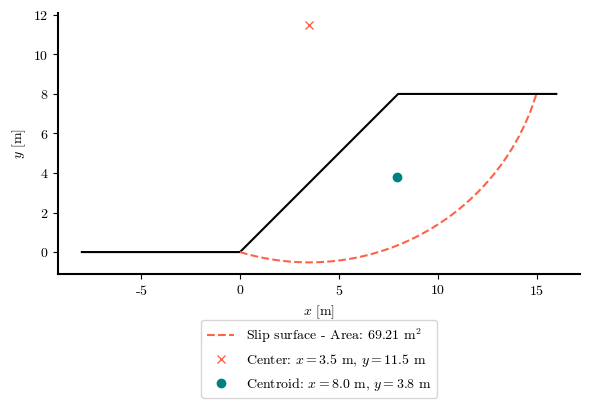

In [7]:
plot_slope(
    height=8, inclination=45, hzt_dist=8, center_x=3.5, center_y=11.5
)


### Interactive figure

In [8]:
style = {'description_width': '150px'}
interact(  # Interactive widgets
    plot_slope,
    height=widgets.FloatText(value=8, description="Height [m]", style=style),
    inclination=widgets.FloatText(value=45, description="Inclination [°]", style=style),
    hzt_dist=widgets.FloatText(value=8, description="Toe/crown dist. [m]", style=style),
    center_x=widgets.FloatText(value=3.5, description="Center abscissa [m]", style=style),
    center_y=widgets.FloatText(value=11.5, description="Center ordinate [m]", style=style)
)

interactive(children=(FloatText(value=8.0, description='Height [m]', style=DescriptionStyle(description_width=…

<function __main__.plot_slope(height=8, inclination=45, hzt_dist=4, center_x=3.5, center_y=11.5)>